In [1]:
import pandas as pd
import numpy as np

In [4]:
Data = pd.read_csv('demand forecast/{file}'.format(file='sales_train.csv.gz'),encoding="latin_1",sep=",")

In [6]:
Data

date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
2935844           1.0  
2935845           1.0  
2935846           1.0  
2935847           1.0  
2935848           1.0  

[2935849 rows x 6 columns]

In [10]:
Data['date'].min()

'01.01.2013'

In [11]:
Data['date'].max()

'31.12.2014'

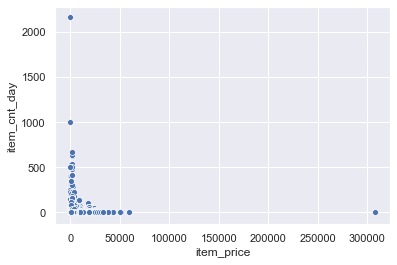

In [12]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="item_price", y="item_cnt_day", data=Data)

In [21]:
Data[["item_id","item_cnt_day"]].groupby("item_id").agg("sum").reset_index(drop=False).sort_values(by=['item_cnt_day'], ascending=False)

item_id  item_cnt_day
20602    20949      187642.0
2749      2808       17245.0
3654      3732       16642.0
17418    17717       15830.0
5717      5822       14515.0
...        ...           ...
7401      7547           0.0
13223    13474          -1.0
17760    18062          -1.0
11664    11871          -1.0
1552      1590         -11.0

[21807 rows x 2 columns]

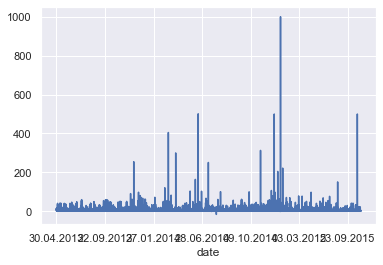

In [28]:
Data[Data["item_id"]==20949].set_index("date")["item_cnt_day"].plot()

In [34]:
table = Data[["item_id","shop_id","item_cnt_day"]].groupby(["item_id","shop_id"]).agg("count").reset_index(drop=False).sort_values(by=['item_cnt_day'], ascending=False)

In [35]:
table[table["item_id"]==20949]

item_id  shop_id  item_cnt_day
403329    20949       28           867
403332    20949       31           863
403354    20949       53           863
403324    20949       22           848
403343    20949       42           834
403356    20949       56           830
403319    20949       16           828
403323    20949       21           824
403312    20949        7           823
403336    20949       35           817
403326    20949       25           800
403317    20949       14           798
403347    20949       46           790
403311    20949        6           771
403359    20949       59           760
403338    20949       37           760
403357    20949       57           759
403325    20949       24           755
403351    20949       50           744
403328    20949       27           711
403310    20949        5           711
403327    20949       26           711
403322    20949       19           711
403309    20949        4           686
403358    20949       58           667
403321    20949       18           653
403348    20949       47           651
403330    20949       29           648
403353    20949       52           637
403355    20949       54           626
403318    20949       15           617
403331    20949       30           603
403339    20949       38           585
403307    20949        2           568
403344    20949       43           560
403340    20949       39           548
403345    20949       44           514
403313    20949       10           513
403346    20949       45           476
403352    20949       51           465
403308    20949        3           462
403320    20949       17           444
403342    20949       41           439
403349    20949       48           399
403350    20949       49           379
403316    20949       13           361
403341    20949       40           232
403335    20949       34           216
403334    20949       33           156
403333    20949       32            29
403314    20949       11            17
403337    20949       36             8
403315    20949       12             3

In [43]:
import torch
from balanced_kmeans import kmeans
# experiment constants
N = 10000
batch_size = 10
num_clusters = 100
dim=400
device = 'cuda'

cluster_size = N // num_clusters
X = torch.rand(batch_size, N, dim, device=device)
choices, centers = kmeans(X, num_clusters=num_clusters)

RuntimeError: expand(torch.cuda.LongTensor{[400]}, size=[]): the number of sizes provided (0) must be greater or equal to the number of dimensions in the tensor (1)

In [44]:
from balanced_kmeans import kmeans_equal
N = 10000
batch_size = 10
num_clusters = 100
device = 'cuda'

cluster_size = N // num_clusters
X = torch.rand(batch_size, N, dim, device=device)
choices, centers = kmeans_equal(X, cluster_size=cluster_size,num_clusters=num_clusters)

RuntimeError: CUDA out of memory. Tried to allocate 14.90 GiB (GPU 0; 4.00 GiB total capacity; 383.12 MiB already allocated; 2.51 GiB free; 426.00 MiB reserved in total by PyTorch)

In [41]:
choices

tensor([[52,  6, 16,  ..., 99, 95, 98],
        [92, 35,  1,  ..., 63, 93, 97],
        [ 3, 27, 76,  ..., 97,  1, 93],
        ...,
        [ 3, 80,  5,  ..., 40, 58, 96],
        [60, 26, 37,  ..., 93, 93, 22],
        [39, 34, 73,  ..., 94, 99, 97]], device='cuda:0')

In [42]:
centers

tensor([[[0.2516, 0.0849, 0.1078],
         [0.5200, 0.5102, 0.8661],
         [0.9169, 0.8751, 0.4351],
         ...,
         [0.6612, 0.4468, 0.4510],
         [0.7575, 0.7632, 0.3845],
         [0.5784, 0.4428, 0.4566]],

        [[0.5811, 0.5288, 0.7465],
         [0.2004, 0.4674, 0.5014],
         [0.3484, 0.7359, 0.3743],
         ...,
         [0.2656, 0.5189, 0.3853],
         [0.7254, 0.3651, 0.7408],
         [0.6978, 0.3747, 0.6489]],

        [[0.2795, 0.6065, 0.5707],
         [0.1293, 0.2641, 0.7387],
         [0.4249, 0.5910, 0.3096],
         ...,
         [0.0945, 0.4920, 0.6238],
         [0.2065, 0.1552, 0.2834],
         [0.5500, 0.6366, 0.5561]],

        ...,

        [[0.0965, 0.7138, 0.6786],
         [0.7004, 0.5835, 0.7157],
         [0.7262, 0.3658, 0.7038],
         ...,
         [0.8572, 0.6046, 0.2848],
         [0.4318, 0.3748, 0.7615],
         [0.5054, 0.6149, 0.4154]],

        [[0.4689, 0.3936, 0.2504],
         [0.6007, 0.9134, 0.7133],
         [0.

In [64]:
"""Equal Groups K-Means clustering utlizing the scikit-learn api and related
utilities.
BSD 3-clause "New" or "Revised" License
version 0.17.1
"""


import warnings

import numpy as np
import scipy.sparse as sp

from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
from sklearn.cluster import k_means_
# from sklearn.cluster import _k_means
from joblib import Parallel
from joblib import delayed
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils.extmath import row_norms, squared_norm
from sklearn.utils.sparsefuncs import mean_variance_axis
from sklearn.utils import check_array
from sklearn.utils import check_random_state
from sklearn.utils import as_float_array
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.validation import FLOAT_DTYPES



class EqualGroupsKMeans(BaseEstimator, ClusterMixin, TransformerMixin):
    """Equal Groups K-Means clustering
    90 percent of this is the Kmeans implmentations with the equal groups logic
    located in `_labels_inertia_precompute_dense()` which follows the steps laid
    out in the Elki Same-size k-Means Variation tutorial.
    https://elki-project.github.io/tutorial/same-size_k_means
    Please note that this implementation only works in scikit-learn 17.X as later
    versions having breaking changes to this implementation.
    Parameters
    ----------
    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.
    max_iter : int, default: 300
        Maximum number of iterations of the k-means algorithm for a
        single run.
    n_init : int, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
    init : {'k-means++', 'random' or an ndarray}
        Method for initialization, defaults to 'k-means++':
        'k-means++' : selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence. See section
        Notes in k_init for more details.
        'random': choose k observations (rows) at random from data for
        the initial centroids.
        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centers.
    precompute_distances : {'auto', True, False}
        Precompute distances (faster but takes more memory).
        'auto' : do not precompute distances if n_samples * n_clusters > 12
        million. This corresponds to about 100MB overhead per job using
        double precision.
        True : always precompute distances
        False : never precompute distances
    tol : float, default: 1e-4
        Relative tolerance with regards to inertia to declare convergence
    n_jobs : int
        The number of jobs to use for the computation. This works by computing
        each of the n_init runs in parallel.
        If -1 all CPUs are used. If 1 is given, no parallel computing code is
        used at all, which is useful for debugging. For n_jobs below -1,
        (n_cpus + 1 + n_jobs) are used. Thus for n_jobs = -2, all CPUs but one
        are used.
    random_state : integer or numpy.RandomState, optional
        The generator used to initialize the centers. If an integer is
        given, it fixes the seed. Defaults to the global numpy random
        number generator.
    verbose : int, default 0
        Verbosity mode.
    copy_x : boolean, default True
        When pre-computing distances it is more numerically accurate to center
        the data first.  If copy_x is True, then the original data is not
        modified.  If False, the original data is modified, and put back before
        the function returns, but small numerical differences may be introduced
        by subtracting and then adding the data mean.
    Attributes
    ----------
    cluster_centers_ : array, [n_clusters, n_features]
        Coordinates of cluster centers
    labels_ :
        Labels of each point
    inertia_ : float
        Sum of distances of samples to their closest cluster center.
    Notes
    ------
    The k-means problem is solved using Lloyd's algorithm.
    The average complexity is given by O(k n T), were n is the number of
    samples and T is the number of iteration.
    The worst case complexity is given by O(n^(k+2/p)) with
    n = n_samples, p = n_features. (D. Arthur and S. Vassilvitskii,
    'How slow is the k-means method?' SoCG2006)
    In practice, the k-means algorithm is very fast (one of the fastest
    clustering algorithms available), but it falls in local minima. That's why
    it can be useful to restart it several times.
    See also
    --------
    MiniBatchKMeans:
        Alternative online implementation that does incremental updates
        of the centers positions using mini-batches.
        For large scale learning (say n_samples > 10k) MiniBatchKMeans is
        probably much faster to than the default batch implementation.
    """

    def __init__(self, n_clusters=8, init='k-means++', n_init=10, max_iter=300,
                 tol=1e-4, precompute_distances='auto',
                 verbose=0, random_state=None, copy_x=True, n_jobs=1):

        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.tol = tol
        self.precompute_distances = precompute_distances
        self.n_init = n_init
        self.verbose = verbose
        self.random_state = random_state
        self.copy_x = copy_x
        self.n_jobs = n_jobs

    def _check_fit_data(self, X):
        """Verify that the number of samples given is larger than k"""
        X = check_array(X, accept_sparse='csr', dtype=np.float64)
        if X.shape[0] < self.n_clusters:
            raise ValueError("n_samples=%d should be >= n_clusters=%d" % (
                X.shape[0], self.n_clusters))
        return X

    def _check_test_data(self, X):
        X = check_array(X, accept_sparse='csr', dtype=FLOAT_DTYPES,
                        warn_on_dtype=True)
        n_samples, n_features = X.shape
        expected_n_features = self.cluster_centers_.shape[1]
        if not n_features == expected_n_features:
            raise ValueError("Incorrect number of features. "
                             "Got %d features, expected %d" % (
                                 n_features, expected_n_features))

        return X

    def fit(self, X, y=None):
        """Compute k-means clustering.
        Parameters
        ----------
        X : array-like or sparse matrix, shape=(n_samples, n_features)
        """
        random_state = check_random_state(self.random_state)
        X = self._check_fit_data(X)

        self.cluster_centers_, self.labels_, self.inertia_, self.n_iter_ = \
            k_means(
                X, n_clusters=self.n_clusters, init=self.init,
                n_init=self.n_init, max_iter=self.max_iter,
                verbose=self.verbose, return_n_iter=True,
                precompute_distances=self.precompute_distances,
                tol=self.tol, random_state=random_state, copy_x=self.copy_x,
                n_jobs=self.n_jobs)
        return self

    def fit_predict(self, X, y=None):
        """Compute cluster centers and predict cluster index for each sample.
        Convenience method; equivalent to calling fit(X) followed by
        predict(X).
        """
        return self.fit(X).labels_

    def fit_transform(self, X, y=None):
        """Compute clustering and transform X to cluster-distance space.
        Equivalent to fit(X).transform(X), but more efficiently implemented.
        """
        # Currently, this just skips a copy of the data if it is not in
        # np.array or CSR format already.
        # XXX This skips _check_test_data, which may change the dtype;
        # we should refactor the input validation.
        X = self._check_fit_data(X)
        return self.fit(X)._transform(X)

    def transform(self, X, y=None):
        """Transform X to a cluster-distance space.
        In the new space, each dimension is the distance to the cluster
        centers.  Note that even if X is sparse, the array returned by
        `transform` will typically be dense.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            New data to transform.
        Returns
        -------
        X_new : array, shape [n_samples, k]
            X transformed in the new space.
        """
        check_is_fitted(self, 'cluster_centers_')

        X = self._check_test_data(X)
        return self._transform(X)

    def _transform(self, X):
        """guts of transform method; no input validation"""
        return euclidean_distances(X, self.cluster_centers_)

    def predict(self, X):
        """Predict the closest cluster each sample in X belongs to.
        In the vector quantization literature, `cluster_centers_` is called
        the code book and each value returned by `predict` is the index of
        the closest code in the code book.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            New data to predict.
        Returns
        -------
        labels : array, shape [n_samples,]
            Index of the cluster each sample belongs to.
        """
        check_is_fitted(self, 'cluster_centers_')

        X = self._check_test_data(X)
        x_squared_norms = row_norms(X, squared=True)
        return _labels_inertia(X, x_squared_norms, self.cluster_centers_)[0]

    def score(self, X, y=None):
        """Opposite of the value of X on the K-means objective.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            New data.
        Returns
        -------
        score : float
            Opposite of the value of X on the K-means objective.
        """
        check_is_fitted(self, 'cluster_centers_')

        X = self._check_test_data(X)
        x_squared_norms = row_norms(X, squared=True)
        return -_labels_inertia(X, x_squared_norms, self.cluster_centers_)[1]



def k_means(X, n_clusters, init='k-means++', precompute_distances='auto',
            n_init=10, max_iter=300, verbose=False,
            tol=1e-4, random_state=None, copy_x=True, n_jobs=1,
            return_n_iter=False, sample_weight=None):
    """K-means clustering algorithm.
    Read more in the :ref:`User Guide <k_means>`.
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        The observations to cluster.
    n_clusters : int
        The number of clusters to form as well as the number of
        centroids to generate.
    max_iter : int, optional, default 300
        Maximum number of iterations of the k-means algorithm to run.
    n_init : int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
    init : {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++':
        'k-means++' : selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence. See section
        Notes in k_init for more details.
        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.
        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centers.
        If a callable is passed, it should take arguments X, k and
        and a random state and return an initialization.
    precompute_distances : {'auto', True, False}
        Precompute distances (faster but takes more memory).
        'auto' : do not precompute distances if n_samples * n_clusters > 12
        million. This corresponds to about 100MB overhead per job using
        double precision.
        True : always precompute distances
        False : never precompute distances
    tol : float, optional
        The relative increment in the results before declaring convergence.
    verbose : boolean, optional
        Verbosity mode.
    random_state : integer or numpy.RandomState, optional
        The generator used to initialize the centers. If an integer is
        given, it fixes the seed. Defaults to the global numpy random
        number generator.
    copy_x : boolean, optional
        When pre-computing distances it is more numerically accurate to center
        the data first.  If copy_x is True, then the original data is not
        modified.  If False, the original data is modified, and put back before
        the function returns, but small numerical differences may be introduced
        by subtracting and then adding the data mean.
    n_jobs : int
        The number of jobs to use for the computation. This works by computing
        each of the n_init runs in parallel.
        If -1 all CPUs are used. If 1 is given, no parallel computing code is
        used at all, which is useful for debugging. For n_jobs below -1,
        (n_cpus + 1 + n_jobs) are used. Thus for n_jobs = -2, all CPUs but one
        are used.
    return_n_iter : bool, optional
        Whether or not to return the number of iterations.
    Returns
    -------
    centroid : float ndarray with shape (k, n_features)
        Centroids found at the last iteration of k-means.
    label : integer ndarray with shape (n_samples,)
        label[i] is the code or index of the centroid the
        i'th observation is closest to.
    inertia : float
        The final value of the inertia criterion (sum of squared distances to
        the closest centroid for all observations in the training set).
    best_n_iter: int
        Number of iterations corresponding to the best results.
        Returned only if `return_n_iter` is set to True.
    """
    if n_init <= 0:
        raise ValueError("Invalid number of initializations."
                         " n_init=%d must be bigger than zero." % n_init)
    random_state = check_random_state(random_state)

    if max_iter <= 0:
        raise ValueError('Number of iterations should be a positive number,'
                         ' got %d instead' % max_iter)

    best_inertia = np.infty
    X = as_float_array(X, copy=copy_x)
    tol = _tolerance(X, tol)

    # If the distances are precomputed every job will create a matrix of shape
    # (n_clusters, n_samples). To stop KMeans from eating up memory we only
    # activate this if the created matrix is guaranteed to be under 100MB. 12
    # million entries consume a little under 100MB if they are of type double.
    if precompute_distances == 'auto':
        n_samples = X.shape[0]
        precompute_distances = (n_clusters * n_samples) < 12e6
    elif isinstance(precompute_distances, bool):
        pass
    else:
        raise ValueError("precompute_distances should be 'auto' or True/False"
                         ", but a value of %r was passed" %
                         precompute_distances)

    # subtract of mean of x for more accurate distance computations
    if not sp.issparse(X) or hasattr(init, '__array__'):
        X_mean = X.mean(axis=0)
    if not sp.issparse(X):
        # The copy was already done above
        X -= X_mean

    if hasattr(init, '__array__'):
        init = check_array(init, dtype=np.float64, copy=True)
        _validate_center_shape(X, n_clusters, init)

        init -= X_mean
        if n_init != 1:
            warnings.warn(
                'Explicit initial center position passed: '
                'performing only one init in k-means instead of n_init=%d'
                % n_init, RuntimeWarning, stacklevel=2)
            n_init = 1

    # precompute squared norms of data points
    x_squared_norms = row_norms(X, squared=True)

    best_labels, best_inertia, best_centers = None, None, None
    if n_jobs == 1:
        # For a single thread, less memory is needed if we just store one set
        # of the best results (as opposed to one set per run per thread).
        for it in range(n_init):
            # run a k-means once
            labels, inertia, centers, n_iter_ = _kmeans_single(
                X, n_clusters, max_iter=max_iter, init=init, verbose=verbose,
                precompute_distances=precompute_distances, tol=tol,
                x_squared_norms=x_squared_norms, random_state=random_state, sample_weight=sample_weight)
            # determine if these results are the best so far
            if best_inertia is None or inertia < best_inertia:
                best_labels = labels.copy()
                best_centers = centers.copy()
                best_inertia = inertia
                best_n_iter = n_iter_
    else:
        # parallelisation of k-means runs
        seeds = random_state.randint(np.iinfo(np.int32).max, size=n_init)
        results = Parallel(n_jobs=n_jobs, verbose=0)(
            delayed(_kmeans_single)(X, n_clusters, max_iter=max_iter,
                                    init=init, verbose=verbose, tol=tol,
                                    precompute_distances=precompute_distances,
                                    x_squared_norms=x_squared_norms,
                                    # Change seed to ensure variety
                                    random_state=seed)
            for seed in seeds)
        # Get results with the lowest inertia
        labels, inertia, centers, n_iters = zip(*results)
        best = np.argmin(inertia)
        best_labels = labels[best]
        best_inertia = inertia[best]
        best_centers = centers[best]
        best_n_iter = n_iters[best]

    if not sp.issparse(X):
        if not copy_x:
            X += X_mean
        best_centers += X_mean

    if return_n_iter:
        return best_centers, best_labels, best_inertia, best_n_iter
    else:
        return best_centers, best_labels, best_inertia


def _kmeans_single(X, n_clusters, x_squared_norms, max_iter=300,
                   init='k-means++', verbose=False, random_state=None,
                   tol=1e-4, precompute_distances=True, sample_weight=None):
    """A single run of k-means, assumes preparation completed prior.
    Parameters
    ----------
    X: array-like of floats, shape (n_samples, n_features)
        The observations to cluster.
    n_clusters: int
        The number of clusters to form as well as the number of
        centroids to generate.
    max_iter: int, optional, default 300
        Maximum number of iterations of the k-means algorithm to run.
    init: {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++':
        'k-means++' : selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence. See section
        Notes in k_init for more details.
        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.
        If an ndarray is passed, it should be of shape (k, p) and gives
        the initial centers.
        If a callable is passed, it should take arguments X, k and
        and a random state and return an initialization.
    tol: float, optional
        The relative increment in the results before declaring convergence.
    verbose: boolean, optional
        Verbosity mode
    x_squared_norms: array
        Precomputed x_squared_norms.
    precompute_distances : boolean, default: True
        Precompute distances (faster but takes more memory).
    random_state: integer or numpy.RandomState, optional
        The generator used to initialize the centers. If an integer is
        given, it fixes the seed. Defaults to the global numpy random
        number generator.
    Returns
    -------
    centroid: float ndarray with shape (k, n_features)
        Centroids found at the last iteration of k-means.
    label: integer ndarray with shape (n_samples,)
        label[i] is the code or index of the centroid the
        i'th observation is closest to.
    inertia: float
        The final value of the inertia criterion (sum of squared distances to
        the closest centroid for all observations in the training set).
    n_iter : int
        Number of iterations run.
    """

    if sample_weight == None:
        sample_weight = np.ones(X.shape[0])

    random_state = check_random_state(random_state)

    best_labels, best_inertia, best_centers = None, None, None
    # init
    centers = k_means_._init_centroids(X, n_clusters, init, random_state=random_state,
                              x_squared_norms=x_squared_norms)
    if verbose:
        print("Initialization complete")

    # Allocate memory to store the distances for each sample to its
    # closer center for reallocation in case of ties
    distances = np.zeros(shape=(X.shape[0],), dtype=np.float64)

    # iterations
    for i in range(max_iter):
        centers_old = centers.copy()
        # labels assignment is also called the E-step of EM
        labels, inertia = \
            _labels_inertia(X, x_squared_norms, centers,
                            precompute_distances=precompute_distances,
                            distances=distances)

        sample_weight = [1.0] * np.asarray(len(labels))
        # computation of the means is also called the M-step of EM
        if sp.issparse(X):
            centers = k_means.centers_sparse(X, sample_weight, labels, n_clusters,
                                               distances)
        else:
            centers = k_means.centers_dense(X, sample_weight, labels, n_clusters, distances)

        if verbose:
            print("Iteration %2d, inertia %.3f" % (i, inertia))

        if best_inertia is None or inertia < best_inertia:
            best_labels = labels.copy()
            best_centers = centers.copy()
            best_inertia = inertia

        shift = squared_norm(centers_old - centers)
        if shift <= tol:
            if verbose:
                print("Converged at iteration %d" % i)

            break

    if shift > 0:
        # rerun E-step in case of non-convergence so that predicted labels
        # match cluster centers
        best_labels, best_inertia = \
            _labels_inertia(X, x_squared_norms, best_centers,
                            precompute_distances=precompute_distances,
                            distances=distances)

    return best_labels, best_inertia, best_centers, i + 1


def _validate_center_shape(X, n_centers, centers):
    """Check if centers is compatible with X and n_centers"""
    if len(centers) != n_centers:
        raise ValueError('The shape of the initial centers (%s) '
                         'does not match the number of clusters %i'
                         % (centers.shape, n_centers))
    if centers.shape[1] != X.shape[1]:
        raise ValueError(
            "The number of features of the initial centers %s "
            "does not match the number of features of the data %s."
            % (centers.shape[1], X.shape[1]))


def _tolerance(X, tol):
    """Return a tolerance which is independent of the dataset"""
    if sp.issparse(X):
        variances = mean_variance_axis(X, axis=0)[1]
    else:
        variances = np.var(X, axis=0)
    return np.mean(variances) * tol


def _labels_inertia(X, x_squared_norms, centers,
                    precompute_distances=True, distances=None):
    """E step of the K-means EM algorithm.
    Compute the labels and the inertia of the given samples and centers.
    This will compute the distances in-place.
    Parameters
    ----------
    X: float64 array-like or CSR sparse matrix, shape (n_samples, n_features)
        The input samples to assign to the labels.
    x_squared_norms: array, shape (n_samples,)
        Precomputed squared euclidean norm of each data point, to speed up
        computations.
    centers: float64 array, shape (k, n_features)
        The cluster centers.
    precompute_distances : boolean, default: True
        Precompute distances (faster but takes more memory).
    distances: float64 array, shape (n_samples,)
        Pre-allocated array to be filled in with each sample's distance
        to the closest center.
    Returns
    -------
    labels: int array of shape(n)
        The resulting assignment
    inertia : float
        Sum of distances of samples to their closest cluster center.
    """
    n_samples = X.shape[0]
    # set the default value of centers to -1 to be able to detect any anomaly
    # easily
    labels = -np.ones(n_samples, np.int32)
    if distances is None:
        distances = np.zeros(shape=(0,), dtype=np.float64)
    # distances will be changed in-place
    if sp.issparse(X):
        inertia = k_means_.k_means._assign_labels_csr(
            X, x_squared_norms, centers, labels, distances=distances)
    else:
        if precompute_distances:
            return _labels_inertia_precompute_dense(X, x_squared_norms,
                                                    centers, distances)
        inertia = k_means_.k_means._assign_labels_array(
            X, x_squared_norms, centers, labels, distances=distances)
    return labels, inertia



def _labels_inertia_precompute_dense(X, x_squared_norms, centers, distances):
    """Compute labels and inertia using a full distance matrix.
    This will overwrite the 'distances' array in-place.
    Parameters
    ----------
    X : numpy array, shape (n_sample, n_features)
        Input data.
    x_squared_norms : numpy array, shape (n_samples,)
        Precomputed squared norms of X.
    centers : numpy array, shape (n_clusters, n_features)
        Cluster centers which data is assigned to.
    distances : numpy array, shape (n_samples,)
        Pre-allocated array in which distances are stored.
    Returns
    -------
    labels : numpy array, dtype=np.int, shape (n_samples,)
        Indices of clusters that samples are assigned to.
    inertia : float
        Sum of distances of samples to their closest cluster center.
    """
    centers = np.nan_to_num(centers)
    n_samples = X.shape[0]
    k = centers.shape[0]
    all_distances = euclidean_distances(centers, X, x_squared_norms,
                                        squared=True)
    labels = np.empty(n_samples, dtype=np.int32)
    labels.fill(-1)
    mindist = np.empty(n_samples)
    mindist.fill(np.infty)


    n_samples = X.shape[0]
    k = centers.shape[0]
    max_cluster_size = get_clusters_size(n_samples, k)

    labels, mindist = initial_assignment(labels, mindist, n_samples, all_distances, max_cluster_size)
    all_points = np.arange(n_samples)

    for point in all_points:
        for point_dist in get_best_point_distances(point, all_distances):
            cluster_id, point_dist = point_dist
            # initial assignment
            if not is_cluster_full(cluster_id, max_cluster_size, labels):
                labels[point] = cluster_id
                mindist[point] = point_dist
                break

    # refinement of clustering
    transfer_list = []
    best_mindist = mindist.copy()
    best_labels = labels.copy()
    # sort all of the points from largest distance to smallest
    points_by_high_distance = np.argsort(mindist)[::-1]
    for point in points_by_high_distance:
        point_cluster = labels[point]

        # see if there is an opening on the best cluster for this point
        cluster_id, point_dist = get_best_cluster_for_point(point, all_distances)
        if not is_cluster_full(cluster_id, max_cluster_size, labels) and point_cluster != cluster_id:
            labels[point] = cluster_id
            mindist[point] = point_dist
            best_labels = labels.copy()
            best_mindist = mindist.copy()
            continue # on to the next point

        for swap_candidate in transfer_list:
            cand_cluster = labels[swap_candidate]
            if point_cluster != cand_cluster:

                # get the current dist of swap candidate
                cand_distance = mindist[swap_candidate]

                # get the potential dist of point
                point_distance = all_distances[cand_cluster, point]

                # compare
                if point_distance < cand_distance:

                    labels[point] = cand_cluster
                    mindist[point] = all_distances[cand_cluster, point]

                    labels[swap_candidate] = point_cluster
                    mindist[swap_candidate] = all_distances[point_cluster, swap_candidate]

                    if np.absolute(mindist).sum() <  np.absolute(best_mindist).sum():
                        # update the labels since the transfer was a success
                        best_labels = labels.copy()
                        best_mindist = mindist.copy()
                        break

                    else:
                        # reset since the transfer was not a success
                        labels = best_labels.copy()
                        mindist = best_mindist.copy()

        transfer_list.append(point)

    if n_samples == distances.shape[0]:
        # distances will be changed in-place
        distances[:] = mindist
    inertia = best_mindist.sum()

    return best_labels, inertia

def get_best_cluster_for_point(point, all_distances):
    """Gets the best cluster by distance for a point
    Argument
    --------
    point : int
        the point index
    Returns
    --------
    tuple
        (cluster_id, distance_from_cluster_center)
    """

    sorted_distances = get_best_point_distances(point, all_distances)
    cluster_id, point_dist = sorted_distances[0]
    return cluster_id, point_dist

def get_best_point_distances(point, all_distances):
    """Gets a sorted by best distance of clusters
    Argument
    --------
    point : int
        the point index
    Returns
    --------
    list of tuples sorted by point_dist
        example: [(cluster_id, point_dist), (cluster_id, point_dist)]
    """
    points_distances = all_distances[:, point]
    sorted_points = sort_adjust_row(points_distances)
    return sorted_points

def sort_adjust_row(points_distances):
    "Sorts the points row from smallest distance to lowest distance"
    return sorted([(cluster_id, point_dist) for cluster_id, point_dist in enumerate(points_distances)], key=lambda x: x[1])

def is_cluster_full(cluster_id, max_cluster_size, labels):
    """Determies in a cluster is full"""
    cluster_count = len(np.where(labels==cluster_id)[0])
    is_full = cluster_count >= max_cluster_size
    return is_full

def get_clusters_size(n_samples, n_clusters):
    """Gets the number of members per cluster for equal groups kmeans"""
    return (n_samples + n_clusters - 1) // n_clusters

def initial_assignment(labels, mindist, n_samples, all_distances, max_cluster_size):
    """Initial assignment of labels and mindist"""
    all_points = np.arange(n_samples)
    for point in all_points:
        for point_dist in get_best_point_distances(point, all_distances):
            cluster_id, point_dist = point_dist
            # initial assignment
            if not is_cluster_full(cluster_id, max_cluster_size, labels):
                labels[point] = cluster_id
                mindist[point] = point_dist
                break
    return labels, mindist

In [65]:
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
# %autoreload 
clf = EqualGroupsKMeans(n_clusters=5, random_state=0)
%timeit clf.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass Y_norm_squared=[20.25 24.25 24.25 20.25 24.25 24.25] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


AttributeError: 'function' object has no attribute 'centers_dense'